First 5 rows of the dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  Setosa  
1  Setosa  
2  Setosa  
3  Setosa  
4  Setosa  


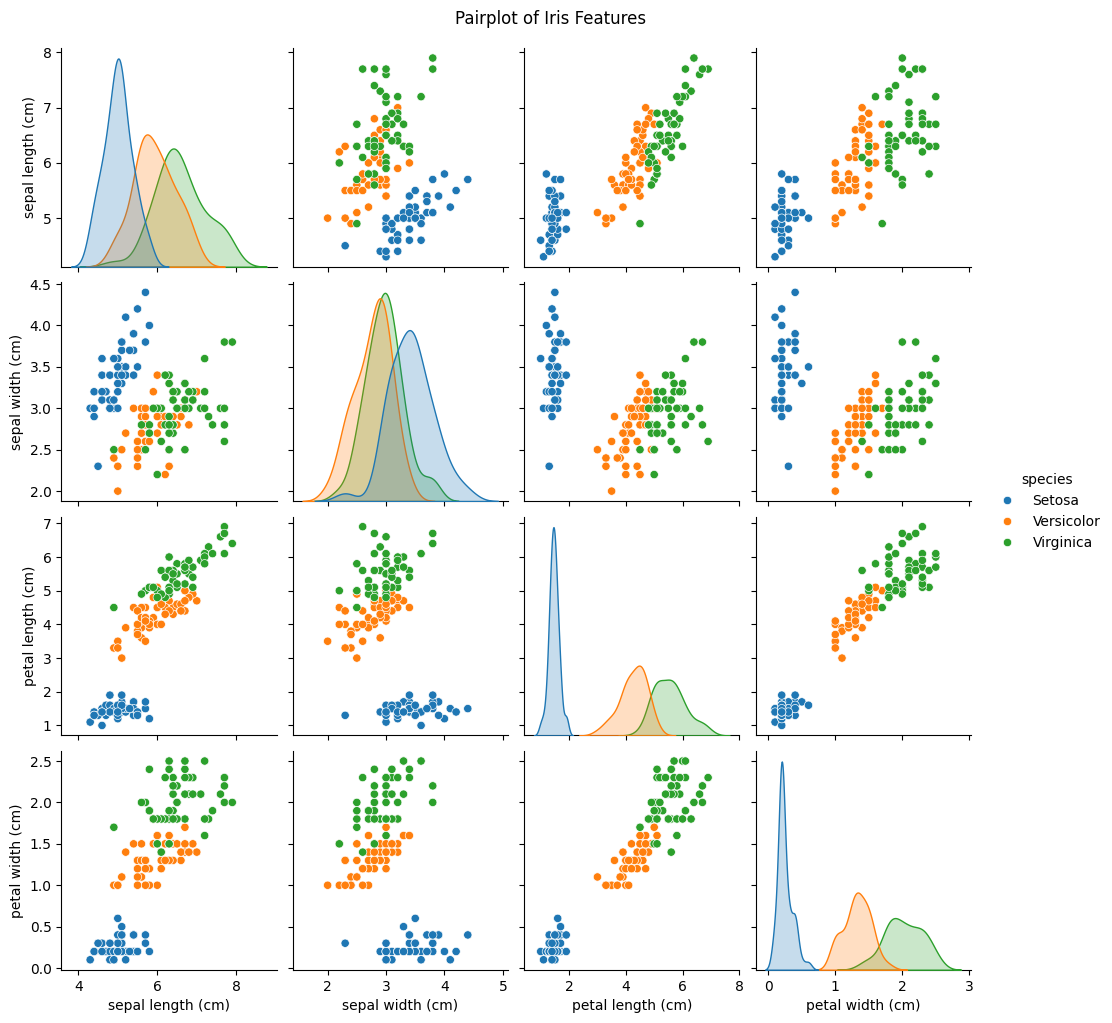

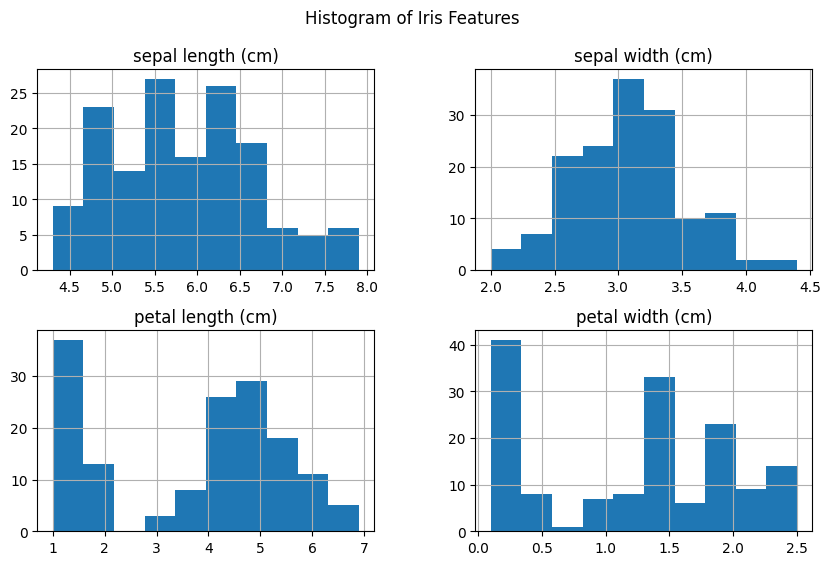


KNN Accuracy for different values of k:
k = 1 -> Accuracy: 1.00
k = 2 -> Accuracy: 1.00
k = 3 -> Accuracy: 1.00
k = 4 -> Accuracy: 1.00
k = 5 -> Accuracy: 1.00
k = 6 -> Accuracy: 1.00
k = 7 -> Accuracy: 0.97
k = 8 -> Accuracy: 1.00
k = 9 -> Accuracy: 1.00
k = 10 -> Accuracy: 1.00

Using k=3 for final model:
Final Accuracy: 1.0


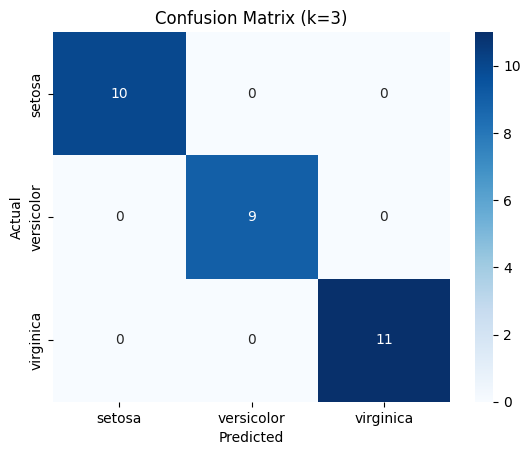

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

iris = datasets.load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target
df['species'] = df['species'].map({0: 'Setosa', 1: 'Versicolor', 2: 'Virginica'})

print("First 5 rows of the dataset:")
print(df.head())

sns.pairplot(df, hue='species')
plt.suptitle("Pairplot of Iris Features", y=1.02)
plt.show()

df.hist(figsize=(10, 6))
plt.suptitle("Histogram of Iris Features")
plt.show()

X = df[iris.feature_names]
y = df['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nKNN Accuracy for different values of k:")
for k in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"k = {k} -> Accuracy: {acc:.2f}")

print("\nUsing k=3 for final model:")
knn_final = KNeighborsClassifier(n_neighbors=3)
knn_final.fit(X_train, y_train)
y_final_pred = knn_final.predict(X_test)
final_acc = accuracy_score(y_test, y_final_pred)
print("Final Accuracy:", final_acc)

cm = confusion_matrix(y_test, y_final_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (k=3)')
plt.show()
